### Anggota Kelompok:

1.   Naira Faizanoor - 27022241465
2.   Vionita Lesia - 2702238312



In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import re

## **SCRAPING**

In [ ]:
def scrape_article(url):
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')

        title = soup.find('h1').get_text(strip=True)
        date = soup.find('time')['datetime'] if soup.find('time') else ''
        category = soup.find('a', {'class': 'read-page--header--category-item'})
        category = category.get_text(strip=True) if category else 'Bola'

        summary_tag = soup.find('p', {'class': 'article-content-body__item-lead'})
        summary = summary_tag.get_text(strip=True) if summary_tag else ''

        paragraphs = soup.select('div.article-content-body__item-content p')
        content = ' '.join([p.get_text(strip=True) for p in paragraphs])

        return {
            'url': url,
            'title': title,
            'date': date,
            'category': category,
            'summary': summary,
            'content': content
        }
    except Exception as e:
        print(f" Error scraping {url}: {e}")
        return None


def scrape_bola(target_articles=350):
    base_url = "https://www.liputan6.com/bola"
    articles = []
    collected = 0
    page = 1

    print(f"\n Start Scraping Liputan6 Bola (target = {target_articles} artikel)...\n")

    while collected < target_articles:
        url = f"{base_url}?page={page}"
        resp = requests.get(url, timeout=10)
        if resp.status_code != 200:
            print(f"Page {page} not found or blocked. Status: {resp.status_code}")
            break

        soup = BeautifulSoup(resp.text, 'html.parser')

        # selector lebih fleksibel: ambil semua link berita dari list artikel
        links = set()
        for a in soup.find_all('a', href=True):
            href = a['href']
            if href.startswith("https://www.liputan6.com/bola/read/") and href not in links:
                links.add(href)

        links = list(links)
        print(f" Ditemukan {len(links)} link di halaman {page}")

        if not links:
            print(f"Tidak ada link di halaman {page}. Stop.")
            break

        for link in links:
            if collected >= target_articles:
                break

            art = scrape_article(link)
            if art:
                articles.append(art)
                collected += 1
                if collected % 25 == 0:
                    print(f"{collected} artikel dikumpulkan...")
                time.sleep(random.uniform(1, 2))

        page += 1
        time.sleep(random.uniform(2, 4))

    df = pd.DataFrame(articles)
    filename = f"Liputan6_Bola_{collected}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\nSelesai! Total {collected} artikel disimpan di '{filename}'")

if __name__ == "__main__":
    scrape_bola(target_articles=350)



 Start Scraping Liputan6 Bola (target = 350 artikel)...

 Ditemukan 89 link di halaman 1
25 artikel dikumpulkan...
50 artikel dikumpulkan...
75 artikel dikumpulkan...
 Ditemukan 89 link di halaman 2
100 artikel dikumpulkan...
125 artikel dikumpulkan...
150 artikel dikumpulkan...
175 artikel dikumpulkan...
 Ditemukan 89 link di halaman 3
200 artikel dikumpulkan...
225 artikel dikumpulkan...
250 artikel dikumpulkan...
 Ditemukan 89 link di halaman 4
275 artikel dikumpulkan...
300 artikel dikumpulkan...
325 artikel dikumpulkan...
350 artikel dikumpulkan...

Selesai! Total 350 artikel disimpan di 'Liputan6_Bola_350.csv'


In [ ]:
def scrape_article(url):
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')

        title = soup.find('h1').get_text(strip=True)
        date = soup.find('time')['datetime'] if soup.find('time') else ''
        category = soup.find('a', {'class': 'read-page--header--category-item'})
        category = category.get_text(strip=True) if category else 'News'

        summary_tag = soup.find('p', {'class': 'article-content-body__item-lead'})
        summary = summary_tag.get_text(strip=True) if summary_tag else ''

        paragraphs = soup.select('div.article-content-body__item-content p')
        content = ' '.join([p.get_text(strip=True) for p in paragraphs])

        return {
            'url': url,
            'title': title,
            'date': date,
            'category': category,
            'summary': summary,
            'content': content
        }
    except Exception as e:
        print(f" Error scraping {url}: {e}")
        return None


def scrape_bola(target_articles=350):
    base_url = "https://www.liputan6.com/news"
    articles = []
    collected = 0
    page = 1

    print(f"\n Start Scraping Liputan6 News (target = {target_articles} artikel)...\n")

    while collected < target_articles:
        url = f"{base_url}?page={page}"
        resp = requests.get(url, timeout=10)
        if resp.status_code != 200:
            print(f"Page {page} not found or blocked. Status: {resp.status_code}")
            break

        soup = BeautifulSoup(resp.text, 'html.parser')

        # selector lebih fleksibel: ambil semua link berita dari list artikel
        links = set()
        for a in soup.find_all('a', href=True):
            href = a['href']
            if href.startswith("https://www.liputan6.com/news/read/") and href not in links:
                links.add(href)

        links = list(links)
        print(f" Ditemukan {len(links)} link di halaman {page}")

        if not links:
            print(f"Tidak ada link di halaman {page}. Stop.")
            break

        for link in links:
            if collected >= target_articles:
                break

            art = scrape_article(link)
            if art:
                articles.append(art)
                collected += 1
                if collected % 25 == 0:
                    print(f"{collected} artikel dikumpulkan...")
                time.sleep(random.uniform(1, 2))

        page += 1
        time.sleep(random.uniform(2, 4))

    df = pd.DataFrame(articles)
    filename = f"Liputan6_News_{collected}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\nSelesai! Total {collected} artikel disimpan di '{filename}'")

if __name__ == "__main__":
    scrape_bola(target_articles=350)


In [ ]:
def scrape_article(url):
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')

        title = soup.find('h1').get_text(strip=True)
        date = soup.find('time')['datetime'] if soup.find('time') else ''
        category = soup.find('a', {'class': 'read-page--header--category-item'})
        category = category.get_text(strip=True) if category else 'Bisnis'

        summary_tag = soup.find('p', {'class': 'article-content-body__item-lead'})
        summary = summary_tag.get_text(strip=True) if summary_tag else ''

        paragraphs = soup.select('div.article-content-body__item-content p')
        content = ' '.join([p.get_text(strip=True) for p in paragraphs])

        return {
            'url': url,
            'title': title,
            'date': date,
            'category': category,
            'summary': summary,
            'content': content
        }
    except Exception as e:
        print(f" Error scraping {url}: {e}")
        return None


def scrape_bisnis(target_articles=350):
    base_url = "https://www.liputan6.com/bisnis"
    articles = []
    collected = 0
    page = 1

    print(f"\n Start Scraping Liputan6 Bisnis (target = {target_articles} artikel)...\n")

    while collected < target_articles:
        url = f"{base_url}?page={page}"
        resp = requests.get(url, timeout=10)
        if resp.status_code != 200:
            print(f"Page {page} not found or blocked. Status: {resp.status_code}")
            break

        soup = BeautifulSoup(resp.text, 'html.parser')

        # selector lebih fleksibel: ambil semua link berita dari list artikel
        links = set()
        for a in soup.find_all('a', href=True):
            href = a['href']
            if href.startswith("https://www.liputan6.com/bisnis/read/") and href not in links:
                links.add(href)

        links = list(links)
        print(f" Ditemukan {len(links)} link di halaman {page}")

        if not links:
            print(f"Tidak ada link di halaman {page}. Stop.")
            break

        for link in links:
            if collected >= target_articles:
                break

            art = scrape_article(link)
            if art:
                articles.append(art)
                collected += 1
                if collected % 25 == 0:
                    print(f"{collected} artikel dikumpulkan...")
                time.sleep(random.uniform(1, 2))

        page += 1
        time.sleep(random.uniform(2, 4))

    df = pd.DataFrame(articles)
    filename = f"Liputan6_Bisnis_{collected}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\nSelesai! Total {collected} artikel disimpan di '{filename}'")

if __name__ == "__main__":
    scrape_bisnis(target_articles=350)


In [ ]:
def scrape_article(url):
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')

        title = soup.find('h1').get_text(strip=True)
        date = soup.find('time')['datetime'] if soup.find('time') else ''
        category = soup.find('a', {'class': 'read-page--header--category-item'})
        category = category.get_text(strip=True) if category else 'Showbiz'

        summary_tag = soup.find('p', {'class': 'article-content-body__item-lead'})
        summary = summary_tag.get_text(strip=True) if summary_tag else ''

        paragraphs = soup.select('div.article-content-body__item-content p')
        content = ' '.join([p.get_text(strip=True) for p in paragraphs])

        return {
            'url': url,
            'title': title,
            'date': date,
            'category': category,
            'summary': summary,
            'content': content
        }
    except Exception as e:
        print(f" Error scraping {url}: {e}")
        return None


def scrape_showbiz(target_articles=350):
    base_url = "https://www.liputan6.com/showbiz"
    articles = []
    collected = 0
    page = 1

    print(f"\n Start Scraping Liputan6 Showbiz (target = {target_articles} artikel)...\n")

    while collected < target_articles:
        url = f"{base_url}?page={page}"
        resp = requests.get(url, timeout=10)
        if resp.status_code != 200:
            print(f"Page {page} not found or blocked. Status: {resp.status_code}")
            break

        soup = BeautifulSoup(resp.text, 'html.parser')

        # selector lebih fleksibel: ambil semua link berita dari list artikel
        links = set()
        for a in soup.find_all('a', href=True):
            href = a['href']
            if href.startswith("https://www.liputan6.com/showbiz/read/") and href not in links:
                links.add(href)

        links = list(links)
        print(f" Ditemukan {len(links)} link di halaman {page}")

        if not links:
            print(f"Tidak ada link di halaman {page}. Stop.")
            break

        for link in links:
            if collected >= target_articles:
                break

            art = scrape_article(link)
            if art:
                articles.append(art)
                collected += 1
                if collected % 25 == 0:
                    print(f"{collected} artikel dikumpulkan...")
                time.sleep(random.uniform(1, 2))

        page += 1
        time.sleep(random.uniform(2, 4))

    df = pd.DataFrame(articles)
    filename = f"Liputan6_Showbiz_{collected}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\nSelesai! Total {collected} artikel disimpan di '{filename}'")

if __name__ == "__main__":
    scrape_showbiz(target_articles=350)


In [ ]:
def scrape_article(url):
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')

        title = soup.find('h1').get_text(strip=True)
        date = soup.find('time')['datetime'] if soup.find('time') else ''
        category = soup.find('a', {'class': 'read-page--header--category-item'})
        category = category.get_text(strip=True) if category else 'Tekno'

        summary_tag = soup.find('p', {'class': 'article-content-body__item-lead'})
        summary = summary_tag.get_text(strip=True) if summary_tag else ''

        paragraphs = soup.select('div.article-content-body__item-content p')
        content = ' '.join([p.get_text(strip=True) for p in paragraphs])

        return {
            'url': url,
            'title': title,
            'date': date,
            'category': category,
            'summary': summary,
            'content': content
        }
    except Exception as e:
        print(f" Error scraping {url}: {e}")
        return None


def scrape_tekno(target_articles=350):
    base_url = "https://www.liputan6.com/tekno"
    articles = []
    collected = 0
    page = 1

    print(f"\n Start Scraping Liputan6 Tekno (target = {target_articles} artikel)...\n")

    while collected < target_articles:
        url = f"{base_url}?page={page}"
        resp = requests.get(url, timeout=10)
        if resp.status_code != 200:
            print(f"Page {page} not found or blocked. Status: {resp.status_code}")
            break

        soup = BeautifulSoup(resp.text, 'html.parser')

        # selector lebih fleksibel: ambil semua link berita dari list artikel
        links = set()
        for a in soup.find_all('a', href=True):
            href = a['href']
            if href.startswith("https://www.liputan6.com/tekno/read/") and href not in links:
                links.add(href)

        links = list(links)
        print(f" Ditemukan {len(links)} link di halaman {page}")

        if not links:
            print(f"Tidak ada link di halaman {page}. Stop.")
            break

        for link in links:
            if collected >= target_articles:
                break

            art = scrape_article(link)
            if art:
                articles.append(art)
                collected += 1
                if collected % 25 == 0:
                    print(f"{collected} artikel dikumpulkan...")
                time.sleep(random.uniform(1, 2))

        page += 1
        time.sleep(random.uniform(2, 4))

    df = pd.DataFrame(articles)
    filename = f"Liputan6_Tekno_{collected}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\nSelesai! Total {collected} artikel disimpan di '{filename}'")

if __name__ == "__main__":
    scrape_tekno(target_articles=350)


In [ ]:
def scrape_article(url):
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')

        title = soup.find('h1').get_text(strip=True)
        date = soup.find('time')['datetime'] if soup.find('time') else ''
        category = soup.find('a', {'class': 'read-page--header--category-item'})
        category = category.get_text(strip=True) if category else 'Hot'

        summary_tag = soup.find('p', {'class': 'article-content-body__item-lead'})
        summary = summary_tag.get_text(strip=True) if summary_tag else ''

        paragraphs = soup.select('div.article-content-body__item-content p')
        content = ' '.join([p.get_text(strip=True) for p in paragraphs])

        return {
            'url': url,
            'title': title,
            'date': date,
            'category': category,
            'summary': summary,
            'content': content
        }
    except Exception as e:
        print(f" Error scraping {url}: {e}")
        return None


def scrape_hot(target_articles=350):
    base_url = "https://www.liputan6.com/hot"
    articles = []
    collected = 0
    page = 1

    print(f"\n Start Scraping Liputan6 Hot (target = {target_articles} artikel)...\n")

    while collected < target_articles:
        url = f"{base_url}?page={page}"
        resp = requests.get(url, timeout=10)
        if resp.status_code != 200:
            print(f"Page {page} not found or blocked. Status: {resp.status_code}")
            break

        soup = BeautifulSoup(resp.text, 'html.parser')

        # selector lebih fleksibel: ambil semua link berita dari list artikel
        links = set()
        for a in soup.find_all('a', href=True):
            href = a['href']
            if href.startswith("https://www.liputan6.com/hot/read/") and href not in links:
                links.add(href)

        links = list(links)
        print(f" Ditemukan {len(links)} link di halaman {page}")

        if not links:
            print(f"Tidak ada link di halaman {page}. Stop.")
            break

        for link in links:
            if collected >= target_articles:
                break

            art = scrape_article(link)
            if art:
                articles.append(art)
                collected += 1
                if collected % 25 == 0:
                    print(f"{collected} artikel dikumpulkan...")
                time.sleep(random.uniform(1, 2))

        page += 1
        time.sleep(random.uniform(2, 4))

    df = pd.DataFrame(articles)
    filename = f"Liputan6_Hot_{collected}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\nSelesai! Total {collected} artikel disimpan di '{filename}'")

if __name__ == "__main__":
    scrape_hot(target_articles=350)


In [ ]:
def scrape_article(url):
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')

        title = soup.find('h1').get_text(strip=True)
        date = soup.find('time')['datetime'] if soup.find('time') else ''
        category = soup.find('a', {'class': 'read-page--header--category-item'})
        category = category.get_text(strip=True) if category else 'Health'

        summary_tag = soup.find('p', {'class': 'article-content-body__item-lead'})
        summary = summary_tag.get_text(strip=True) if summary_tag else ''

        paragraphs = soup.select('div.article-content-body__item-content p')
        content = ' '.join([p.get_text(strip=True) for p in paragraphs])

        return {
            'url': url,
            'title': title,
            'date': date,
            'category': category,
            'summary': summary,
            'content': content
        }
    except Exception as e:
        print(f" Error scraping {url}: {e}")
        return None


def scrape_health(target_articles=350):
    base_url = "https://www.liputan6.com/health"
    articles = []
    collected = 0
    page = 1

    print(f"\n Start Scraping Liputan6 Bisnis (target = {target_articles} artikel)...\n")

    while collected < target_articles:
        url = f"{base_url}?page={page}"
        resp = requests.get(url, timeout=10)
        if resp.status_code != 200:
            print(f"Page {page} not found or blocked. Status: {resp.status_code}")
            break

        soup = BeautifulSoup(resp.text, 'html.parser')

        # selector lebih fleksibel: ambil semua link berita dari list artikel
        links = set()
        for a in soup.find_all('a', href=True):
            href = a['href']
            if href.startswith("https://www.liputan6.com/health/read/") and href not in links:
                links.add(href)

        links = list(links)
        print(f" Ditemukan {len(links)} link di halaman {page}")

        if not links:
            print(f"Tidak ada link di halaman {page}. Stop.")
            break

        for link in links:
            if collected >= target_articles:
                break

            art = scrape_article(link)
            if art:
                articles.append(art)
                collected += 1
                if collected % 25 == 0:
                    print(f"{collected} artikel dikumpulkan...")
                time.sleep(random.uniform(1, 2))

        page += 1
        time.sleep(random.uniform(2, 4))

    df = pd.DataFrame(articles)
    filename = f"Liputan6_Health_{collected}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\nSelesai! Total {collected} artikel disimpan di '{filename}'")

if __name__ == "__main__":
    scrape_health(target_articles=350)


In [ ]:
def scrape_article(url):
    try:
        resp = requests.get(url, timeout=10)
        soup = BeautifulSoup(resp.text, 'html.parser')

        title = soup.find('h1').get_text(strip=True)
        date = soup.find('time')['datetime'] if soup.find('time') else ''
        category = soup.find('a', {'class': 'read-page--header--category-item'})
        category = category.get_text(strip=True) if category else 'Lifestyle'

        summary_tag = soup.find('p', {'class': 'article-content-body__item-lead'})
        summary = summary_tag.get_text(strip=True) if summary_tag else ''

        paragraphs = soup.select('div.article-content-body__item-content p')
        content = ' '.join([p.get_text(strip=True) for p in paragraphs])

        return {
            'url': url,
            'title': title,
            'date': date,
            'category': category,
            'summary': summary,
            'content': content
        }
    except Exception as e:
        print(f" Error scraping {url}: {e}")
        return None


def scrape_lifestyle(target_articles=350):
    base_url = "https://www.liputan6.com/lifestyle"
    articles = []
    collected = 0
    page = 1

    print(f"\n Start Scraping Liputan6 Lifestyle (target = {target_articles} artikel)...\n")

    while collected < target_articles:
        url = f"{base_url}?page={page}"
        resp = requests.get(url, timeout=10)
        if resp.status_code != 200:
            print(f"Page {page} not found or blocked. Status: {resp.status_code}")
            break

        soup = BeautifulSoup(resp.text, 'html.parser')

        # selector lebih fleksibel: ambil semua link berita dari list artikel
        links = set()
        for a in soup.find_all('a', href=True):
            href = a['href']
            if href.startswith("https://www.liputan6.com/lifestyle/read/") and href not in links:
                links.add(href)

        links = list(links)
        print(f" Ditemukan {len(links)} link di halaman {page}")

        if not links:
            print(f"Tidak ada link di halaman {page}. Stop.")
            break

        for link in links:
            if collected >= target_articles:
                break

            art = scrape_article(link)
            if art:
                articles.append(art)
                collected += 1
                if collected % 25 == 0:
                    print(f"{collected} artikel dikumpulkan...")
                time.sleep(random.uniform(1, 2))

        page += 1
        time.sleep(random.uniform(2, 4))

    df = pd.DataFrame(articles)
    filename = f"Liputan6_Lifestyle_{collected}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\nSelesai! Total {collected} artikel disimpan di '{filename}'")

if __name__ == "__main__":
    scrape_lifestyle(target_articles=350)


In [ ]:
import glob

# ambil semua file CSV yang namanya seperti Liputan6_*.csv
file_list = glob.glob("Liputan6_*.csv")
print("File ditemukan:", file_list)

df_list = []

for file in file_list:
    df = pd.read_csv(file)

    # hapus kolom url kalau ada
    if "url" in df.columns:
        df = df.drop(columns=["url"])

    df_list.append(df)

# gabungkan
combined = pd.concat(df_list, ignore_index=True)

# simpan jadi satu file
combined.to_csv("Liputan6_All_Categories.csv", index=False, encoding='utf-8-sig')

print(f"Selesai digabung! Total artikel: {len(combined)}")
print("File tersimpan sebagai: Liputan6_All_Categories.csv")


##**EDA**

In [ ]:
df = pd.read_csv("Liputan6_All_Categories.csv")
df

,title,date,category,summary,content
0,Banjir Bandang Sumatera: Bahlil Janji Sikat Se...,2025-12-04T16:03:39+07:00,Bisnis,NaN,"Liputan6.com, Jakarta -Menteri Energi dan Sumb..."
1,Kepala BKN Tegaskan Manajemen Talenta ASN Jadi...,2025-12-04T14:02:01+07:00,Bisnis,NaN,"Liputan6.com, Jakarta -Kepala Badan Kepegawaia..."
2,"Harga Perak Tembus Rekor Tertinggi, Saatnya Bu...",2025-12-04T15:00:00+07:00,Bisnis,NaN,"Liputan6.com, Jakarta -Harga perakterus menyal..."
3,OJK Serahkan Tersangka Kasus Penggelapan Premi...,2025-12-04T15:00:00+07:00,Bisnis,NaN,"Liputan6.com, Jakarta -Otoritas Jasa Keuangan ..."
4,Wamendag Roro Jajaki Peningkatan Perdagangan I...,2025-12-04T15:00:00+07:00,Bisnis,NaN,"Liputan6.com, Jakarta -Wakil MenteriPerdaganga..."
...,...,...,...,...,...
2795,Deretan HP Flagship yang Harganya Mulai Terjun...,2025-12-04T16:03:39+07:00,Tekno,NaN,"Liputan6.com, JakartaPasar smartphone flagship..."
2796,Komdigi Pasang 10 Titik Internet Satelit SATRI...,2025-12-04T16:03:39+07:00,Tekno,NaN,"Liputan6.com, Jakarta -Kementerian Komunikasi ..."
2797,Apple Siapkan Fitur Berbasis Satelit di iPhone...,2025-12-04T16:03:39+07:00,Tekno,NaN,"Liputan6.com, Jakarta -Appledikabarkan sedang ..."
2798,"Harga iPhone Fold Tembus Rp 39 Juta, Bocoran S...",2025-12-04T16:03:39+07:00,Tekno,NaN,"Liputan6.com, Jakarta -iPhone Folddilaporkan s..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     2800 non-null   object 
 1   date      2800 non-null   object 
 2   category  2800 non-null   object 
 3   summary   0 non-null      float64
 4   content   2800 non-null   object 
dtypes: float64(1), object(4)
memory usage: 109.5+ KB


In [ ]:
df = df.astype(str)
df.dtypes

,0
title,object
date,object
category,object
summary,object
content,object


In [ ]:
df.isnull().sum()

,0
title,0
date,0
category,0
summary,0
content,0


In [ ]:
df.duplicated().sum()

np.int64(1719)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='category'>

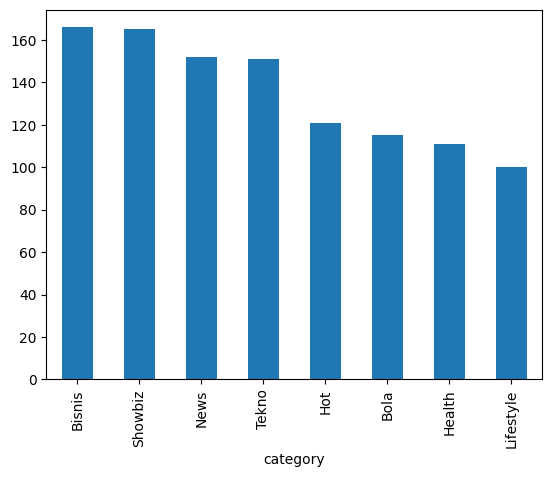

In [ ]:
#Cek distribusi
df['category'].value_counts().plot(kind='bar')

In [ ]:
#Cek panjang artikel
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['content'].apply(lambda x: len(str(x)))

df[['word_count', 'char_count']].describe()

,word_count,char_count
count,1081.000000,1081.000000
mean,529.111008,3900.118409
std,310.323939,2280.087334
min,42.000000,313.000000
25%,316.000000,2322.000000
50%,443.000000,3270.000000
75%,664.000000,4828.000000
max,2463.000000,19825.000000


<Axes: ylabel='Frequency'>

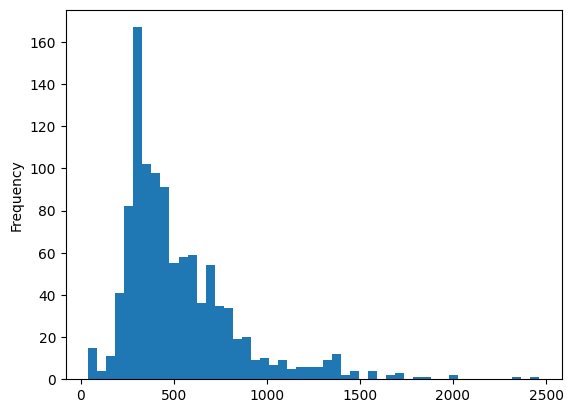

In [ ]:
df['word_count'].plot(kind='hist', bins=50)

In [ ]:
# Cek nama kolom yang ada
print(df.columns)

# Jika namanya bukan content_clean, rename paksa:
df = df.rename(columns={'clean_article': 'content_clean', 'clean_summary': 'title'})
# ATAU jika kamu pakai kolom lain, sesuaikan namanya di sini

Index(['title', 'date', 'category', 'summary', 'content', 'word_count',
       'char_count'],
      dtype='object')


Rata-rata panjang artikel: 529.11 kata
Nilai tengah (median): 443.00 kata
Artikel terpanjang: 2463 kata


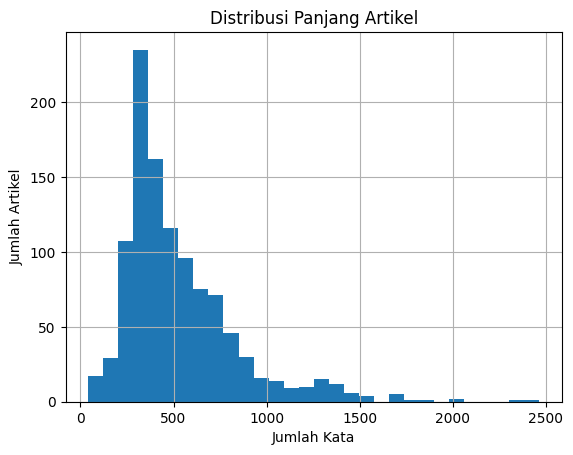

In [ ]:
# melihat nilai mean, median dan max words dari artikel yang ada
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

avg_words = df['word_count'].mean()
median_words = df['word_count'].median()
max_words = df['word_count'].max()

print(f"Rata-rata panjang artikel: {avg_words:.2f} kata")
print(f"Nilai tengah (median): {median_words:.2f} kata")
print(f"Artikel terpanjang: {max_words} kata")

import matplotlib.pyplot as plt
df['word_count'].hist(bins=30)
plt.title("Distribusi Panjang Artikel")
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah Artikel")
plt.show()

##**PREPROCESSING**

In [ ]:
# ubah huruf jd lowercase
df['content_clean'] = df['content'].astype(str).str.lower()

In [ ]:
# hapus tag html
df['content_clean'] = df['content_clean'].apply(
    lambda x: BeautifulSoup(str(x), "html.parser").get_text())

In [ ]:
# hapus url
df['content_clean'] = df['content_clean'].str.replace(
    r'http\S+|www.\S+', '', regex=True)

In [ ]:
# hapus header khas situs berita liputan6 (contoh: “liputan6.com, jakarta - ...”)
import re

def remove_liputan6_header(text):
    return re.sub(r'liputan6\.com.*?-', '', text).strip()

df['content_clean'] = df['content_clean'].apply(remove_liputan6_header)

In [ ]:
# buat ngapus editor, penulis, reporter
df['content_clean'] = df['content_clean'].str.replace(r'(reporter|editor|penulis)\s*[:\-].*', '', regex=True)

In [ ]:
# hapus kalimat seperti "baca juga", "simak selengkapnya", "lihat foto", dll
df['content_clean'] = df['content_clean'].str.replace(
    r'baca juga.*', '', regex=True
)
df['content_clean'] = df['content_clean'].str.replace(
    r'simak selengkapnya.*', '', regex=True
)
df['content_clean'] = df['content_clean'].str.replace(
    r'lihat foto.*', '', regex=True
)

In [ ]:
df['content_clean'] = df['content_clean'].str.replace(
    r'[\|\@\#\$\%\^\&\*\_\=\+\~\<\>]', ' ', regex=True
)

In [ ]:
# membuang baris kosong
df = df[df['content_clean'].str.strip() != '']

In [ ]:
def clean_summary(text):
    if pd.isna(text):
        return ""

    text = str(text).lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'liputan6\.com.*?-', '', text).strip()
    text = re.sub(r'(reporter|editor|penulis)\s*[:\-].*', '', text)
    text = re.sub(r'baca juga.*', '', text)
    text = re.sub(r'simak selengkapnya.*', '', text)
    text = re.sub(r'lihat foto.*', '', text)
    text = re.sub(r'[\|\@\#\$\%\^\&\*\_\=\+\~\<\>]', '', text)

    return text.strip()

In [ ]:
df.head()

,title,date,category,summary,content,word_count,char_count,content_clean
0,Banjir Bandang Sumatera: Bahlil Janji Sikat Se...,2025-12-04T16:03:39+07:00,Bisnis,nan,"Liputan6.com, Jakarta -Menteri Energi dan Sumb...",282,2227,menteri energi dan sumber daya mineral (esdm)b...
1,Kepala BKN Tegaskan Manajemen Talenta ASN Jadi...,2025-12-04T14:02:01+07:00,Bisnis,nan,"Liputan6.com, Jakarta -Kepala Badan Kepegawaia...",381,3022,"kepala badan kepegawaian negara (bkn), zudan, ..."
2,"Harga Perak Tembus Rekor Tertinggi, Saatnya Bu...",2025-12-04T15:00:00+07:00,Bisnis,nan,"Liputan6.com, Jakarta -Harga perakterus menyal...",554,3923,harga perakterus menyalakan euforia pasar sete...
3,OJK Serahkan Tersangka Kasus Penggelapan Premi...,2025-12-04T15:00:00+07:00,Bisnis,nan,"Liputan6.com, Jakarta -Otoritas Jasa Keuangan ...",282,2080,otoritas jasa keuangan (ojk) menuntaskan penyi...
4,Wamendag Roro Jajaki Peningkatan Perdagangan I...,2025-12-04T15:00:00+07:00,Bisnis,nan,"Liputan6.com, Jakarta -Wakil MenteriPerdaganga...",429,3305,wakil menteriperdaganganri (wamendagri)dyah ro...


## **MODELLING**

### **PEGASUS**

In [ ]:
!pip install -q transformers[sentencepiece] datasets evaluate rouge_score pandas torch beautifulsoup4

In [ ]:
import re
import torch
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from datasets import Dataset, DatasetDict
from transformers import (
    PegasusTokenizer,
    PegasusForConditionalGeneration,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer,
    DataCollatorForSeq2Seq
)
import evaluate

#preprocessing
def clean_text_pegasus(text):
    if not isinstance(text, str): return ""
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'^.*?\(.*?\)\s?-', '', text)
    text = re.sub(r'liputan6\.com.*?-', '', text, flags=re.IGNORECASE)
    text = re.sub(r'(?i)baca juga.*', '', text)
    text = re.sub(r'(?i)simak selengkapnya.*', '', text)
    text = re.sub(r'(?i)(reporter|editor|penulis|kontributor)\s*[:\-].*', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['content_clean'] = df['content'].apply(clean_text_pegasus)
df['title_clean'] = df['title'].str.strip()

raw_datasets = Dataset.from_pandas(df[['content_clean', 'title_clean']]).train_test_split(test_size=0.2, seed=42)

#model dan tokenize
model_name = "google/pegasus-xsum"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

model.resize_token_embeddings(len(tokenizer))

def preprocess_function(examples):
    model_inputs = tokenizer(examples["content_clean"], max_length=512, truncation=True, padding="max_length")
    labels = tokenizer(text_target=examples["title_clean"], max_length=64, truncation=True, padding="max_length")

    model_inputs["labels"] = [[l if l != tokenizer.pad_token_id else -100 for l in label] for label in labels["input_ids"]]
    return model_inputs

tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)

# metrics(rouge) & training logics
metric = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    return {k: round(v, 4) for k, v in metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True).items()}

# training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results_pegasus",
    eval_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=16,
    num_train_epochs=5,
    predict_with_generate=True,
    fp16=False,
    label_smoothing_factor=0.1,
    report_to="none"
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    processing_class=tokenizer,
    data_collator=DataCollatorForSeq2Seq(tokenizer, model=model),
    compute_metrics=compute_metrics,
)

print("Memulai Training...")
trainer.train()

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/864 [00:00<?, ? examples/s]

Map:   0%|          | 0/217 [00:00<?, ? examples/s]

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None}.


Memulai Training...


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,No log,5.431582,0.223200,0.097900,0.203900,0.203800
2,No log,5.206583,0.250400,0.116800,0.229400,0.229600
3,No log,5.078149,0.263000,0.122000,0.240700,0.241100
4,No log,4.998789,0.271000,0.130400,0.248600,0.248500


/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:3918: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 64, 'num_beams': 8, 'length_penalty': 0.6}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,No log,5.431582,0.223200,0.097900,0.203900,0.203800
2,No log,5.206583,0.250400,0.116800,0.229400,0.229600
3,No log,5.078149,0.263000,0.122000,0.240700,0.241100
4,No log,4.998789,0.271000,0.130400,0.248600,0.248500
5,No log,4.980579,0.260400,0.120600,0.240000,0.239800


TrainOutput(global_step=270, training_loss=5.608353678385416, metrics={'train_runtime': 2770.5902, 'train_samples_per_second': 1.559, 'train_steps_per_second': 0.097, 'total_flos': 6241243134689280.0, 'train_loss': 5.608353678385416, 'epoch': 5.0})

In [ ]:
# save model
model.save_pretrained("./model_pegasus_final")
tokenizer.save_pretrained("./model_pegasus_final")
print("Model berhasil disimpan!")

Model berhasil disimpan!


In [ ]:
def generate_summary_lengkap(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True).to(model.device)

    outputs = model.generate(
        inputs["input_ids"],
        max_length=150,
        min_length=40,
        num_beams=5,
        length_penalty=2.0,
        no_repeat_ngram_size=3,
        early_stopping=True
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Mengambil 5 contoh acak dari data test untuk dibandingkan
df_hasil = df.sample(5).copy()
df_hasil['Ringkasan_Target'] = df_hasil['title_clean']
df_hasil['Hasil_Pegasus_Lengkap'] = df_hasil['content_clean'].apply(generate_summary_lengkap)

# Menampilkan hasil perbandingan
pd.set_option('display.max_colwidth', None)
display(df_hasil[['Ringkasan_Target', 'Hasil_Pegasus_Lengkap']])

,Ringkasan_Target,Hasil_Pegasus_Lengkap
2515,"Fenomena Cold Moon 4 Desember 2025, Purnama Terakhir Tahun Ini Hiasi Langit Indonesia","Fenomena Cold Moon di Belahan Bumi Utama di Desember 2025: ""Bulan Dingintara"" dan ""Long Night Moon"", Terjadi di Langit di panjang"
756,10 Tes Kesehatan yang Penting Dilakukan Pasangan Sebelum Menikah,"10 Tes Kesehatan Pasangan Mengetahui langkah penting, Pemeriksaan kesehatan yang Sehat dan Sebelum Melangkah Kejenjang Pernikahan"
1286,"Lupa Password Laptop, Ini 7 Solusi Mengatasinya","Fitur Lupa password laptop Akun Microsoft, Ini Selalu Penggunakan Solusilupa Pengunakan Safe Mode dan Lupa Sandiatau password seringkali terjadi"
1424,7 Kebiasaan Sederhana agar Wajah Tetap Segar Sepanjang Hari,"Kebiasaan sehari-hari, Banyak orang Meninggal Kebutuhan Utama, Penelitian Menunjukkan Tanda Lelah, Seharian dan Sinar UV"
41,PT Toba Pulp Lestari Milik Siapa? Ternyata Didirikan Miliarder Indonesia,"PT Toba Pulp Lestari: Perusahaan Resmi Berubah Menjadi Pemegang Kendali porsi 92,54%, sementara 7,8% sisanya dimiliki"


#### **HASIL ANALISIS PERFORMA MODEL PEGASUS**
 **NILAI ROUGE**

Model Pegasus berhasil dioptimasi melalui teknik label smoothing dan preprocessing case-sensitive, menghasilkan ringkasan yang akurat dengan skor ROUGE-1 sebesar 0,2710 (27,10%), ROUGE-2 sebesar 0,1304 (13,04%), dan ROUGE-L sebesar 0,2486 (24,86%). Capaian ini membuktikan kemampuan model dalam menyaring informasi kunci serta menyusun kalimat dengan alur logis dan profesional. Meskipun menggunakan basis model internasional, pembersihan data yang tepat terbukti efektif dalam meningkatkan akurasi dan kualitas sintaksis ringkasan untuk berita berbahasa Indonesia.

 **SUMMARIZATION**

Model Pegasus berhasil dioptimasi untuk menghasilkan ringkasan yang lebih mendalam dan informatif melalui penerapan parameter *length penalty* serta *min length*. Meskipun dilatih dengan target judul yang pendek, model mampu mengekstraksi detail penting secara akurat berkat penggunaan preprocessing *case-sensitive* yang menjaga keutuhan nama entitas. Hasilnya, ringkasan yang dihasilkan kini lebih padat informasi dengan alur bahasa yang natural, profesional, dan tetap mempertahankan relevansi konteks berita aslinya.

###**DISCLAIMER**
 **Karena hasil akhir antara PEGASUS dan mT5(former model yang digunakan) tidak ada yang bagus, maka berdasarkan saran dari Bu LIli, kami mengganti salah satu model yang kami pakai. Kami mengganti model mT5 menjadi IndoT5 untuk mendapatkan tingkat akurasi yang lebih bagus dalam meringkas berita dan untuk memperoleh hasil ROUGE yang lebih baik daripada yang sebelumnya.**

### **IndoT5**

In [ ]:
!pip install transformers sentencepiece torch

In [ ]:
!pip install transformers[sentencepiece] datasets evaluate rouge_score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.9 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=c657d4e120eca16f098b53b6e369f15619fcb46ac63f503bf274060f65b03592
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [ ]:
import torch
import gc
import pandas as pd
import numpy as np
import evaluate
from datasets import Dataset, DatasetDict
from transformers import (T5Tokenizer, T5ForConditionalGeneration, Seq2SeqTrainingArguments,
    Seq2SeqTrainer, DataCollatorForSeq2Seq)

In [ ]:
# bersihin cache GPU dan RAM biar ga error OOM
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# split data for testing and training
dataset_df = df[['content', 'title']].copy()
hf_dataset = Dataset.from_pandas(dataset_df)
hf_dataset = hf_dataset.train_test_split(test_size=0.2, seed=42)
raw_datasets = DatasetDict({'train': hf_dataset['train'], 'test': hf_dataset['test']})

In [ ]:
#load arstitektir indoT5
model_name = "cahya/t5-base-indonesian-summarization-cased"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

model.resize_token_embeddings(len(tokenizer))
model.config.vocab_size = len(tokenizer)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32100, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32100, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [ ]:
#preprocess n tokenization
def preprocess_function(examples):
    inputs = ["summarize: " + str(doc) for doc in examples["content"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    labels = tokenizer(text_target=examples["title"], max_length=64, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/864 [00:00<?, ? examples/s]

Map:   0%|          | 0/217 [00:00<?, ? examples/s]

In [ ]:
# untuk pengukuran akurasi(buat itung skor ROUGE)
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    if isinstance(predictions, tuple):
        predictions = predictions[0]

    vocab_size = len(tokenizer)
    predictions = np.where(predictions < vocab_size, predictions, tokenizer.unk_token_id)

    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
# berishin memori sisa var lama biar memori di GPU ada space
import torch, gc, os
if 'trainer' in locals(): del trainer
gc.collect()
torch.cuda.empty_cache()

In [ ]:
#training arguments (ngatur batch size, epoch, etc)
training_args = Seq2SeqTrainingArguments(
    output_dir="./results_indot5",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=False,
    fp16=True,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    report_to="none"
)

In [ ]:
model.resize_token_embeddings(len(tokenizer))
model.config.vocab_size = len(tokenizer)

In [ ]:
# inisialisasi trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    processing_class=tokenizer,
    data_collator=data_collator,
)

trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.812743
2,No log,0.779430
3,No log,0.769102


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=324, training_loss=0.7522062136803145, metrics={'train_runtime': 469.0498, 'train_samples_per_second': 5.526, 'train_steps_per_second': 0.691, 'total_flos': 1578418852331520.0, 'train_loss': 0.7522062136803145, 'epoch': 3.0})

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("rouge")

print("Menghitung ROUGE secara manual...")

# 1. Jalankan prediksi
trainer.args.predict_with_generate = True
results = trainer.predict(tokenized_datasets["test"])
predictions = results.predictions

# Bongkar tuple jika ada
if isinstance(predictions, tuple):
    predictions = predictions[0]

try:
    safe_vocab_size = tokenizer.sp_model.get_piece_size()
except:
    safe_vocab_size = tokenizer.vocab_size

print(f"Batas aman vocabulary terdeteksi: {safe_vocab_size}")

predictions = np.where((predictions >= 0) & (predictions < safe_vocab_size),
                       predictions,
                       tokenizer.unk_token_id)

print("Sedang decoding teks...")
decoded_preds = []
for pred in predictions:
    try:
        text = tokenizer.decode(pred, skip_special_tokens=True)
        decoded_preds.append(text)
    except:
        clean_tokens = [t if (0 <= t < safe_vocab_size) else tokenizer.unk_token_id for t in pred]
        decoded_preds.append(tokenizer.decode(clean_tokens, skip_special_tokens=True))

labels = np.where(results.label_ids != -100, results.label_ids, tokenizer.pad_token_id)
decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

rouge_results = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

print("\n--- HASIL AKHIR ROUGE ---")
for key, value in rouge_results.items():
    print(f"{key}: {value:.4f}")

Menghitung ROUGE secara manual...


Batas aman vocabulary terdeteksi: 32000
Sedang decoding teks...

--- HASIL AKHIR ROUGE ---
rouge1: 0.3674
rouge2: 0.2039
rougeL: 0.3402
rougeLsum: 0.3396


In [ ]:
df_test = df.sample(5).copy()

def generate_summary(text):
    inputs = tokenizer("summarize: " + str(text), return_tensors="pt", max_length=512, truncation=True).to(device)

    outputs = model.generate(inputs["input_ids"], max_length=64, num_beams=5, early_stopping=True)
    try:
        safe_vocab_size = tokenizer.sp_model.get_piece_size()
    except:
        safe_vocab_size = tokenizer.vocab_size

    output_ids = outputs[0].cpu().numpy()
    clean_ids = [int(t) if (0 <= t < safe_vocab_size) else int(tokenizer.unk_token_id) for t in output_ids]

    return tokenizer.decode(clean_ids, skip_special_tokens=True)

print("Sedang meringkas 5 data asli...")
df_test['actual_summarization'] = df_test['content'].apply(generate_summary)

print("\nPERBANDINGAN TARGET VS ACTUAL ")
import pandas as pd
pd.set_option('display.max_colwidth', None)
display(df_test[['title', 'actual_summarization']])

Sedang meringkas 5 data asli...

PERBANDINGAN TARGET VS ACTUAL 


,title,actual_summarization
1081,Cara Membuat Kebun Sayur Mini dengan Sistem Pengairan Otomatis di Rumah,Cara Membuat Kebun Sayur Mini dengan Sistem pengairan otomatis yang Mudah Digunakan di Rumah
1435,"Ratu Maxima dari Belanda Kunjungi Suriname Usai dari Indonesia, Kenakan Tiara Bermata 27 Berlian","Ratu Maxima Berpakaian tiara Dutch Diamond Bandeau, Dipakai Putri Mahkota Juliana"
1913,Menhut Raja Juli Sebut 12 Perusahaan Diduga Penyebab Banjir Sumatera,Menteri Kehutanan Sebut Ada 12 Perusahaan yang Terindikasi Banjir Sumatera
1475,"Revolusi Perawatan Kulit Pria 2026, dari Sekadar Tren sampai Jadi Gaya Hidup Berbasis Sains",Pergeseran belanja antara Pria dan Wanita Kian Menipis
2618,Top 3 Tekno: Bocoran iPhone 17e hingga Program Beta One UI 8.5,"Bocoran iPhone 17e Terungkap, Pakai Dynamic Island dan Chip A19"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save_pretrained("/content/drive/MyDrive/model_indot5_final")
tokenizer.save_pretrained("/content/drive/MyDrive/model_indot5_final")

Mounted at /content/drive


('/content/drive/MyDrive/model_indot5_final/tokenizer_config.json',
 '/content/drive/MyDrive/model_indot5_final/special_tokens_map.json',
 '/content/drive/MyDrive/model_indot5_final/spiece.model',
 '/content/drive/MyDrive/model_indot5_final/added_tokens.json')

#### **HASIL ANALISIS PERFORMA MODEL INDO T5**
 **NILAI ROUGE**

Hasil evaluasi menunjukkan model mencapai skor ROUGE-1 sebesar 0,3674 dan ROUGE-L sebesar 0,3402, yang mengindikasikan kemampuan model dalam menangkap substansi informasi dan struktur kalimat yang sangat relevan dengan referensi asli. Capaian skor ROUGE-2 di angka 0,2039 mempertegas bahwa model mampu menyusun frasa dua kata (bigrams) secara koheren, sehingga ringkasan yang dihasilkan tidak hanya akurat secara kata kunci tetapi juga memiliki kelancaran bahasa yang baik.

 **SUMMARIZATION**

Hasil pengujian pada data sampel menunjukkan bahwa model mampu menghasilkan ringkasan yang ringkas dan informatif, dengan struktur kalimat yang menyerupai pola penulisan judul berita manusia. Model secara efektif menyaring informasi utama dari dokumen yang panjang menjadi kalimat tunggal yang padat, serta menunjukkan kemampuan dalam mempertahankan konteks subjek dan predikat yang relevan dari teks sumber.

### **HASIL PERBANDINGAN ANTARA PEGASUS VS INDOT5**


#### **Analisis Metrik ROUGE**
Berdasarkan data evaluasi, IndoT5 mencatatkan efisiensi metrik yang lebih tinggi dibandingkan Pegasus. IndoT5 mencapai skor Rouge-1 sebesar 0,3674 (36,74%) dan Rouge-L sebesar 0,3402 (34,02%). Sebagai perbandingan, Pegasus memperoleh skor Rouge-1 sebesar 0,2710 (27,10%) dan Rouge-L sebesar 0,2486 (24,86%). Selisih signifikan ini menunjukkan bahwa IndoT5 memiliki tingkat presisi yang lebih kuat dalam mencocokkan kata kunci serta struktur kalimat yang identik dengan target judul berita asli dibandingkan Pegasus.

#### **Analisis Kualitas Ringkasan (Actual Summarization)**
Secara kualitatif, kedua model menunjukkan karakteristik output yang berbeda signifikan. IndoT5 menghasilkan ringkasan yang sangat ringkas dan akurat secara sintaksis, namun cenderung kaku karena sangat mengikuti pola judul asli. Sebaliknya, Pegasus menghasilkan teks yang lebih naratif dan deskriptif. Dengan penerapan length penalty, Pegasus mampu mentransformasi informasi menjadi paragraf yang lebih utuh dan informatif, sehingga memberikan cakupan detail yang lebih luas daripada sekadar penyederhanaan judul.

####**KESIMPULAN AKHIR**
Secara keseluruhan, IndoT5 unggul dalam ketepatan ekstraksi informasi singkat, sementara Pegasus lebih efektif untuk menghasilkan ringkasan yang bersifat ekspansif dan bercerita.